Kaggle Link - https://www.kaggle.com/competitions/microsoft-malware-prediction

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score,roc_auc_score,roc_curve
import numpy as np
import seaborn as sns
from sklearn import preprocessing, metrics
import lightgbm as lgb
import gc
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#from sklearn.metrics import roc_auc_score
gc.enable()
import matplotlib.pyplot as plt
import datetime
from sklearn import preprocessing
import re
print('Libraries Imported')

Libraries Imported


In [2]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [3]:
# reading a subset of the data for EDA:
train = pd.read_csv('../input/train.csv', dtype=dtypes, low_memory=True)
print('Loaded train data\n')


Loaded train data



1. **EDA**

In [4]:
(train.isnull().sum()/train.shape[0]).sort_values(ascending=False)

PuaMode                                              0.999741
Census_ProcessorClass                                0.995894
DefaultBrowsersIdentifier                            0.951416
Census_IsFlightingInternal                           0.830440
Census_InternalBatteryType                           0.710468
Census_ThresholdOptIn                                0.635245
Census_IsWIMBootEnabled                              0.634390
SmartScreen                                          0.356108
OrganizationIdentifier                               0.308415
SMode                                                0.060277
CityIdentifier                                       0.036475
Wdft_IsGamer                                         0.034014
Wdft_RegionIdentifier                                0.034014
Census_InternalBatteryNumberOfCharges                0.030124
Census_FirmwareManufacturerIdentifier                0.020541
Census_IsFlightsDisabled                             0.017993
Census_F

Now let us have a look at the data type of all the variables present in the dataset.


In [5]:
# dtype_df = train.dtypes.reset_index()
# dtype_df.columns = ["Count", "Column Type"]
# dtype_df.groupby("Column Type").aggregate('count').reset_index()

Majority of the 'object' columns are related to the product information.
'Float' columns are related to product versions.
'int' columns represent true false information

In [6]:
# #print 
print("Dimension of dataset",train.shape)
print("Target values description")
print((train['HasDetections'].value_counts().reset_index()))

Dimension of dataset (8921483, 83)
Target values description
   index  HasDetections
0      0        4462591
1      1        4458892


From the above chart we can understand that the target column is balanced

In [7]:
# count the number of NaN values in each column
print(train.isnull().sum())

MachineIdentifier                                0
ProductName                                      0
EngineVersion                                    0
AppVersion                                       0
AvSigVersion                                     0
IsBeta                                           0
RtpStateBitfield                             32318
IsSxsPassiveMode                                 0
DefaultBrowsersIdentifier                  8488045
AVProductStatesIdentifier                    36221
AVProductsInstalled                          36221
AVProductsEnabled                            36221
HasTpm                                           0
CountryIdentifier                                0
CityIdentifier                              325409
OrganizationIdentifier                     2751518
GeoNameIdentifier                              213
LocaleEnglishNameIdentifier                      0
Platform                                         0
Processor                      

Lets Look at the number of unique values in the training dataset


In [8]:
#Visualisations
#Function to display barplots
def count_plot(col_name):
    ax = sns.countplot(x=col_name, hue="HasDetections", data=train)
    ax.set_xlabel(col_name)
    ax.set_ylabel("count")    

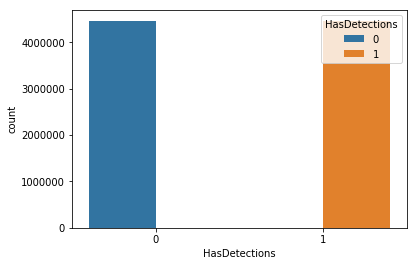

In [9]:
count_plot(train['HasDetections'].name)

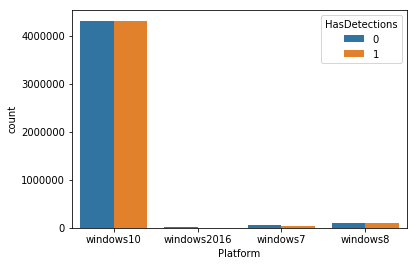

In [10]:
count_plot(train['Platform'].name)

Windows 10 dominates the list

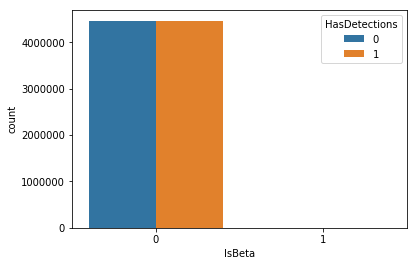

In [11]:
count_plot(train['IsBeta'].name)

1 = True
0 = Not beta.

From the above chart we can see that the IsBeta feature is not balanced

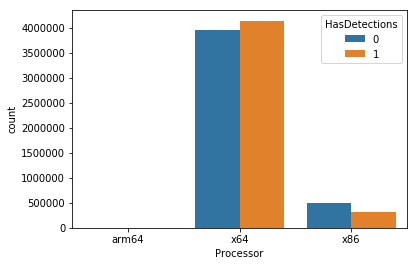

In [12]:
count_plot(train['Processor'].name)

Most of the computers use 64 bit architecture

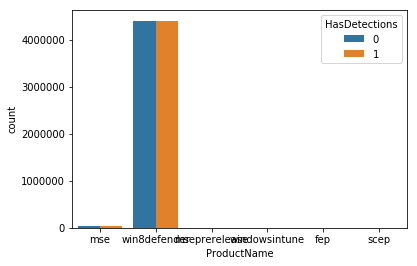

In [13]:
count_plot(train['ProductName'].name)

default defender program provided by windows dominates the list

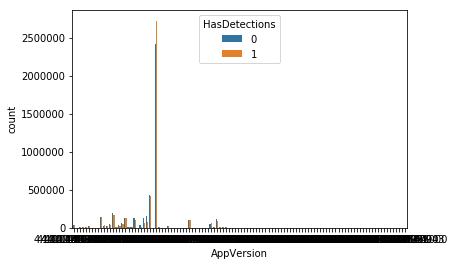

In [14]:
count_plot(train['AppVersion'].name)

In [15]:
# #Extract  sub version from subversion
train["AppVersion"] = train["AppVersion"].astype(object)
train["AppVersion"] = train["AppVersion"].apply(lambda x:  (re.split(r'\.',x))[1])
train["AppVersion"].value_counts()


#Extract  sub version from EngineVersion
train["EngineVersion"] = train["EngineVersion"].astype(object)
train["EngineVersion"] = train["EngineVersion"].apply(lambda x:  (re.split(r'\.',x))[2])
train["EngineVersion"].value_counts()


#Extract  sub version from AvSigVersion
train["AvSigVersion"] = train["AvSigVersion"].astype(object)
train["AvSigVersion"] = train["AvSigVersion"].apply(lambda x:  (re.split(r'\.',x))[1])
# train["AvSigVersion"].value_counts()




In [16]:
# train["AppVersion"] = train["AppVersion"].astype(int)
# train["EngineVersion"] = train["EngineVersion"].astype(int)
# train["AvSigVersion"] = train["AvSigVersion"].astype(int)


train['AppVersion'] = pd.to_numeric(train['AppVersion'], errors='coerce').fillna(0)
train['EngineVersion'] = pd.to_numeric(train['EngineVersion'], errors='coerce').fillna(0)
train['AvSigVersion'] = pd.to_numeric(train['AvSigVersion'], errors='coerce').fillna(0)

In [17]:
train["AppVersion"].dtype

dtype('int64')

In [18]:
train["AvSigVersion"].value_counts()

275.0    3901028
273.0    3724334
271.0     269369
269.0     214502
263.0     160659
267.0     138899
251.0      94182
277.0      79719
237.0      70628
261.0      48790
265.0      47509
259.0      36396
257.0      24257
253.0      15612
249.0      14581
247.0       9753
245.0       9488
233.0       9339
235.0       8826
239.0       7188
225.0       5590
255.0       5029
243.0       4964
241.0       4962
231.0       4692
229.0       4271
227.0       3896
223.0       1862
221.0        764
199.0         86
207.0         73
0.0           69
213.0         36
219.0         19
217.0         19
215.0         15
203.0         13
155.0         10
197.0          9
195.0          8
205.0          7
193.0          6
209.0          6
169.0          5
201.0          4
211.0          3
167.0          3
189.0          1
187.0          1
177.0          1
Name: AvSigVersion, dtype: int64

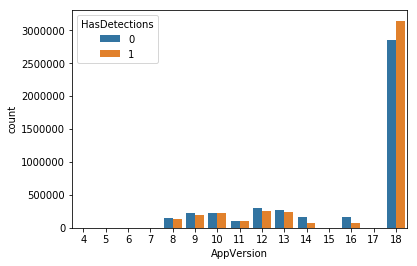

In [19]:
count_plot(train['AppVersion'].name)

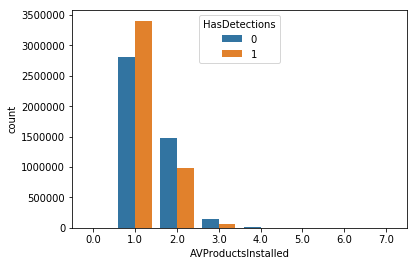

In [20]:
count_plot(train['AVProductsInstalled'].name)

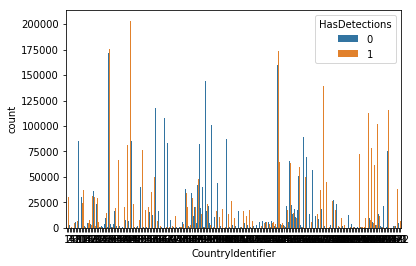

In [21]:
count_plot(train['CountryIdentifier'].name)

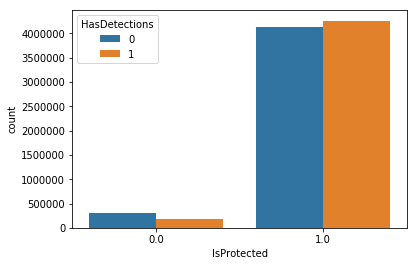

In [22]:
count_plot(train['IsProtected'].name)

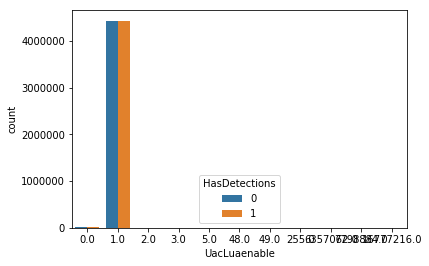

In [23]:
count_plot(train['UacLuaenable'].name)

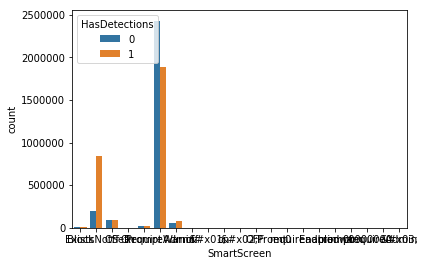

In [24]:
count_plot(train['SmartScreen'].name)  

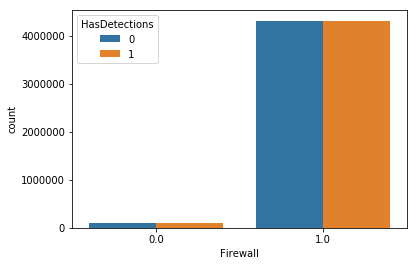

In [25]:
count_plot(train['Firewall'].name)

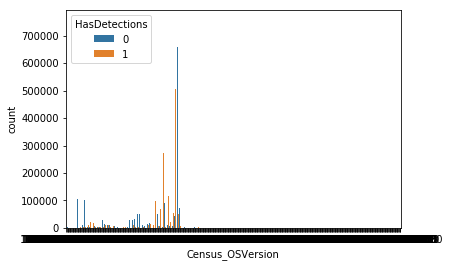

In [26]:
count_plot(train['Census_OSVersion'].name)

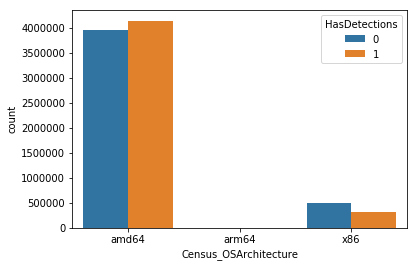

In [27]:
count_plot(train['Census_OSArchitecture'].name)

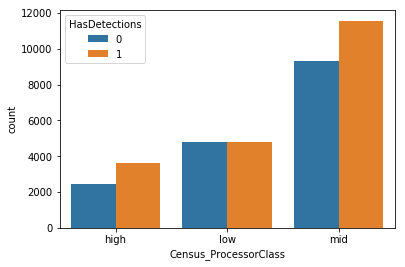

In [28]:
count_plot(train['Census_ProcessorClass'].name)

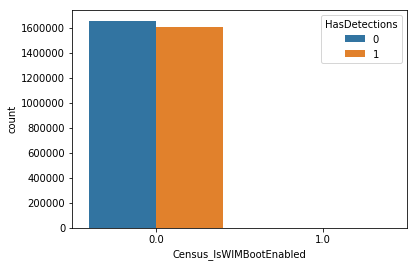

In [29]:
count_plot(train['Census_IsWIMBootEnabled'].name)

Following columns are highly skewed. So removing these coloumns

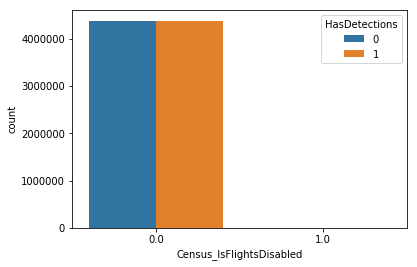

In [30]:
count_plot(train['Census_IsFlightsDisabled'].name)

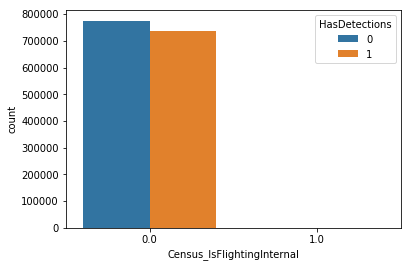

In [31]:
count_plot(train['Census_IsFlightingInternal'].name)

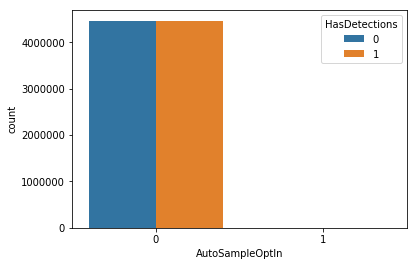

In [32]:
count_plot(train['AutoSampleOptIn'].name)

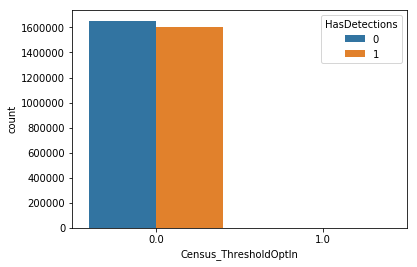

In [33]:
count_plot(train['Census_ThresholdOptIn'].name)

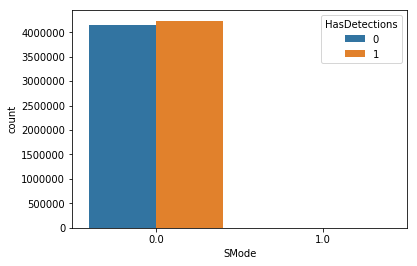

In [34]:
count_plot(train['SMode'].name)

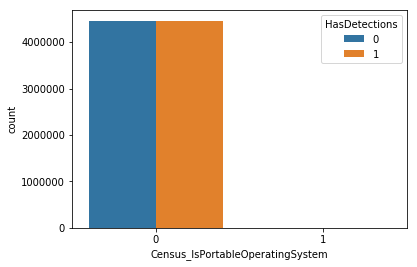

In [35]:
count_plot(train['Census_IsPortableOperatingSystem'].name)

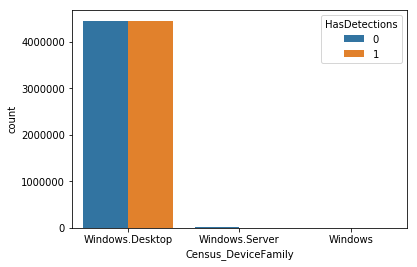

In [36]:
count_plot(train['Census_DeviceFamily'].name)

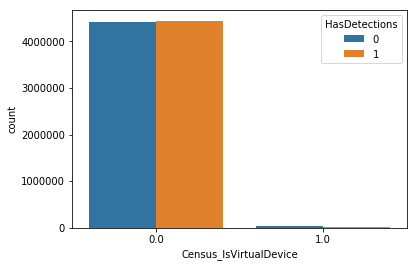

In [37]:
count_plot(train['Census_IsVirtualDevice'].name)

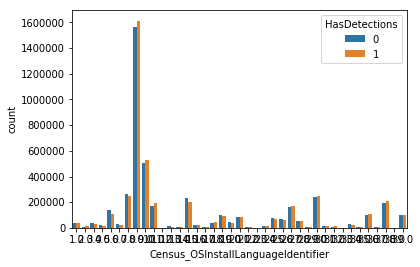

In [38]:
count_plot(train['Census_OSInstallLanguageIdentifier'].name)

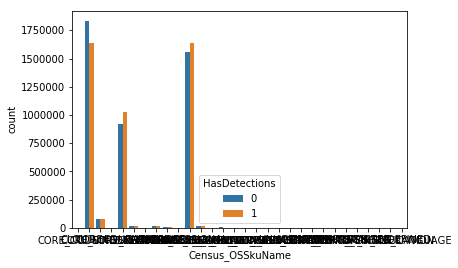

In [39]:
count_plot(train['Census_OSSkuName'].name)

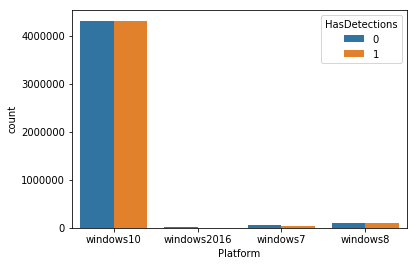

In [40]:
count_plot(train['Platform'].name)

**3. Feature Engineering****

Label encoding these category columns

In [41]:
cat_cols = [
'OsPlatformSubRelease'   ,
'SkuEdition'                                ,
'SmartScreen'                              ,
'Census_MDC2FormFactor'                    ,
'Census_PrimaryDiskTypeName'                ,
# 'Census_ChassisTypeName'                  ,
'Census_PowerPlatformRoleName'            ,
'Census_InternalBatteryType'             ,
# 'Census_OSArchitecture'                   ,
# 'Census_OSBranch'                          ,
'Census_OSEdition'                         ,
'Census_OSInstallTypeName'                  ,
'Census_OSWUAutoUpdateOptionsName'          ,
'Census_GenuineStateName'                ,  
'Census_ActivationChannel'                 ,
'Census_FlightRing',
'ProductName',
# 'AppVersion',
# 'EngineVersion',
# 'AvSigVersion'
 #   'Census_OSArchitecture','Census_OSBranch'
]                   


def doLabelEncoding(dataset,cat_cols):
    le = LabelEncoder()
    for col in cat_cols:
        if dataset[col].dtype.name == 'category': 
            print(col)
            dataset[col] = dataset[col].fillna(dataset[col].mode(),inplace=True)
            dataset[col] = le.fit_transform(dataset[col])

doLabelEncoding(train,cat_cols)

OsPlatformSubRelease
SkuEdition
SmartScreen
Census_MDC2FormFactor
Census_PrimaryDiskTypeName
Census_PowerPlatformRoleName
Census_InternalBatteryType
Census_OSEdition
Census_OSInstallTypeName
Census_OSWUAutoUpdateOptionsName
Census_GenuineStateName
Census_ActivationChannel
Census_FlightRing
ProductName


In [42]:
train.Census_OSBranch.value_counts()

rs4_release                  4009158
rs3_release                  1237321
rs3_release_svc_escrow       1199767
rs2_release                   797066
rs1_release                   785534
th2_release                   326655
th2_release_sec               266882
th1_st1                       195840
th1                            75764
rs5_release                    15324
rs3_release_svc_escrow_im       6181
rs_prerelease                   3171
rs_prerelease_flt               2714
rs5_release_sigma                 62
rs1_release_srvmedia              10
winblue_ltsb_escrow                8
win8_gdr                           3
win7sp1_ldr                        3
winblue_ltsb                       3
rs5_release_sigma_dev              2
rs5_release_edge                   2
win7sp1_ldr_escrow                 2
rs_xbox                            2
rs5_release_sign                   1
rs1_release_sec                    1
rs3_release_svc                    1
Khmer OS                           1
r

In [43]:
# def set_hd_category(row):
#     horz='Census_InternalPrimaryDisplayResolutionHorizontal'
#     vert='Census_InternalPrimaryDisplayResolutionVertical'
    
#     if row[horz]  * row[vert] < 923600:
#         return 1 #Not hd
#     elif (row[horz]  * row[vert] >= 923600) and (row[horz]  * row[vert] <= 1036800):
#         return 2 # hd ready
#     elif (row[horz]  * row[vert] >= 1036800) and (row[horz]  * row[vert] <= 2073600):
#         return 3 # Hd
#     elif (row[horz]  * row[vert] <= 2073600):
#         return 4 #UHD
#     else: 
#         return 5

# train["hd"] = train.apply(set_hd_category, axis=1)

In [44]:
int_cols  =   [#Int cclumns
        'Census_OEMNameIdentifier'                             ,
        'Census_OEMModelIdentifier'                            ,
        'Census_ProcessorModelIdentifier'                      ,
        'Census_PrimaryDiskTotalCapacity'                      ,
        'Census_SystemVolumeTotalCapacity'                     ,
        'Census_TotalPhysicalRAM'                              ,
        'Census_InternalPrimaryDiagonalDisplaySizeInInches'    ,
        'Census_InternalBatteryNumberOfCharges'                ,
        'Census_FirmwareVersionIdentifier'                     ]

In [45]:
# train['Census_PrimaryDiskTotalCapacity'] = preprocessing.scale(train['Census_PrimaryDiskTotalCapacity'].values)
# train['Census_SystemVolumeTotalCapacity'] = preprocessing.scale(train['Census_SystemVolumeTotalCapacity'].values)

# train['Census_TotalPhysicalRAM'] = preprocessing.scale(train['Census_TotalPhysicalRAM'].values)

# train['Census_InternalPrimaryDiagonalDisplaySizeInInches'] = preprocessing.scale(train['Census_InternalPrimaryDiagonalDisplaySizeInInches'].values)

# train['Census_InternalBatteryNumberOfCharges'] = preprocessing.scale(train['Census_InternalBatteryNumberOfCharges'].values)



In [46]:
#         'Census_FlightRing'                                    ,
#         'Census_FirmwareManufacturerIdentifier'                ,
#         'Census_IsSecureBootEnabled'                           ,   
#         'Census_IsTouchEnabled'                                ,
#         'Census_IsPenCapable'                                  ,
#         'Census_IsAlwaysOnAlwaysConnectedCapable'              ,
#         'Wdft_IsGamer'                                         ]

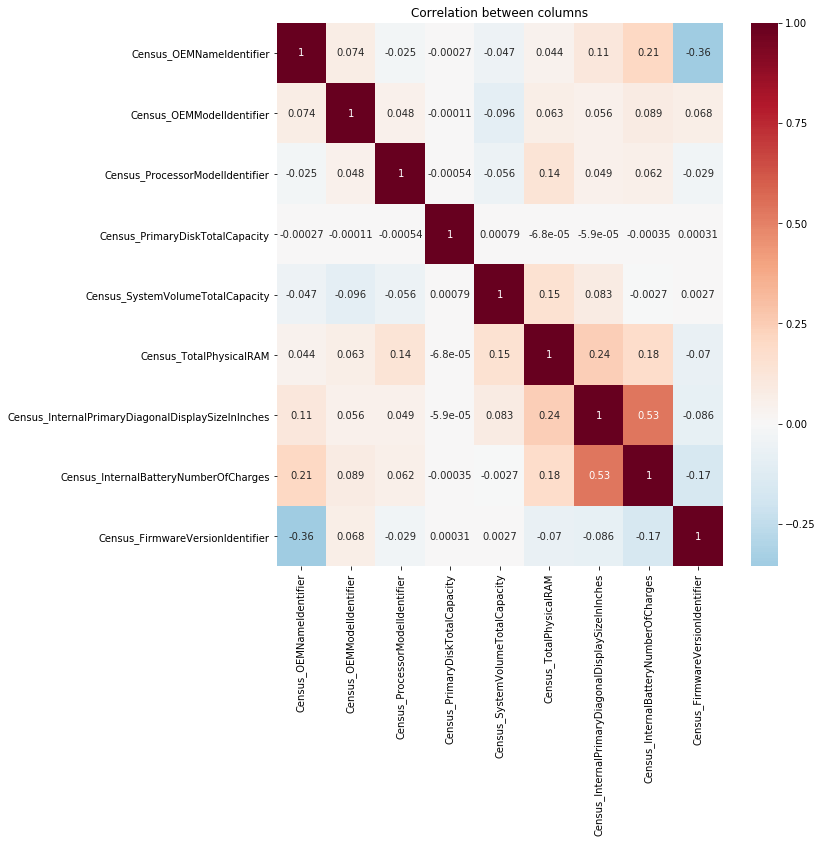

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(train[int_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('Correlation between columns')
plt.show()

In [48]:
# plt.figure(figsize=(10,10))
# sns.heatmap(train[cat_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
# plt.title('Correlation between columns')
# plt.show()

Removing these less important features. 

thanks - https://www.kaggle.com/jiegeng94/everyone-do-this-at-the-beginning


In [49]:
# % of  Missing data 
# PuaMode                                              0.99969
# Census_ProcessorClass                                0.99573
# DefaultBrowsersIdentifier                            0.95110
# Census_IsFlightingInternal                           0.83163
# Census_InternalBatteryType                           0.71240
# Census_ThresholdOptIn                                0.63738
# Census_IsWIMBootEnabled                              0.63659

remove_cols = ['PuaMode', 'Census_ProcessorClass', 'Census_IsWIMBootEnabled',
               'IsBeta', 'Census_IsFlightsDisabled', 'Census_IsFlightingInternal',
               'AutoSampleOptIn', 'Census_ThresholdOptIn', 'SMode',
               'Census_IsPortableOperatingSystem', 'Census_DeviceFamily', 
               'UacLuaenable',  'Platform', 'Census_OSSkuName', 
               'Census_OSInstallLanguageIdentifier', 'Processor']

train.drop(remove_cols, axis=1, inplace=True)


remove_cols = ['CountryIdentifier','GeoNameIdentifier',
               'OsVer','OsBuild','OsBuildLab',
               'Census_OSVersion',
             #  'Census_OSArchitecture','Census_OSBranch',
               'Census_OSBuildNumber','Census_OSBuildRevision'
]

train.drop(remove_cols, axis=1, inplace=True)

remove_cols = ['Census_InternalPrimaryDisplayResolutionHorizontal',
               "Census_InternalPrimaryDisplayResolutionVertical",
               'Census_PrimaryDiskTotalCapacity'
]

train.drop(remove_cols, axis=1, inplace=True)

    

In [50]:
ohe_cols = [
'OsPlatformSubRelease'   ,
'SkuEdition'                                ,
'SmartScreen'                              ,
'Census_MDC2FormFactor'                    ,
'Census_PrimaryDiskTypeName'                ,
# 'Census_ChassisTypeName'                  ,
'Census_PowerPlatformRoleName'            ,
'Census_InternalBatteryType'             ,
# 'Census_OSArchitecture'                   ,
# 'Census_OSBranch'                          ,
'Census_OSEdition'                         ,
'Census_OSInstallTypeName'                  ,
'Census_OSWUAutoUpdateOptionsName'          ,
'Census_GenuineStateName'                ,  
'Census_ActivationChannel'                 ,
'Census_FlightRing',
'ProductName',
'AppVersion',
'EngineVersion',
'AvSigVersion',
'AVProductsInstalled',
'AVProductsEnabled',
'HasTpm'  ,
'IsProtected',
'Firewall',
# 'Census_OEMNameIdentifier',
# 'Census_OEMModelIdentifier',
# 'Census_ProcessorCoreCount',
# 'Census_ProcessorManufacturerIdentifier',
# 'Census_ProcessorModelIdentifier',
# 'Census_OSArchitecture',
# 'Census_OSBranch',
'Census_IsSecureBootEnabled',
'Census_IsVirtualDevice',
'Census_IsTouchEnabled',
'Census_IsPenCapable',
'Census_IsAlwaysOnAlwaysConnectedCapable',
'Wdft_IsGamer'
]                   


In [51]:
# plt.figure(figsize=(26,26))
# sns.heatmap(train[ohe_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
# plt.title('Correlation between columns')
# plt.show()

In [52]:
# def one_hot(dataset, cols):
#     """
#     @param df pandas DataFrame
#     @param cols a list of columns to encode 
#     @return a DataFrame with one-hot encoding
#     """
#     df = pd.DataFrame()
#     for each in cols:
#         dummies = pd.get_dummies(dataset[each], prefix=each, drop_first=False)
#         df = pd.concat([df, dummies], axis=1)
#     return df

In [53]:
# ohe_df = one_hot(train,ohe_cols)
# one_hot_cat_cols = ohe_df.columns

In [54]:
# train.drop(ohe_cols, axis=1, inplace=True)
# train = pd.concat([train, ohe_df], axis=1)

**Setting the features**

In [55]:
features = [        'ProductName'                                          ,
        'EngineVersion'                                        ,
        'AppVersion'                                           ,
        'AvSigVersion'                                         ,        
        'RtpStateBitfield'                                     ,
        'IsSxsPassiveMode'                                     ,
        'DefaultBrowsersIdentifier'                            ,
        'AVProductStatesIdentifier'                            ,
        'AVProductsInstalled'                                  ,
        'AVProductsEnabled'                                    ,
        'HasTpm'                                               ,
        'CityIdentifier'                                       ,
        'OrganizationIdentifier'                               ,
        'LocaleEnglishNameIdentifier'                          ,
        'OsSuite'                                              ,
        'OsPlatformSubRelease'                                 ,
        'SkuEdition'                                           ,
        'IsProtected'                                          ,
        'IeVerIdentifier'                                      ,
        'SmartScreen'                                          ,
        'Firewall'                                             ,
        'Census_MDC2FormFactor'                                ,        
        'Census_ProcessorCoreCount'                            ,
        'Census_ProcessorManufacturerIdentifier'               ,
        'Census_PrimaryDiskTypeName'                           ,
        'Census_HasOpticalDiskDrive'                           ,
        'Census_PowerPlatformRoleName'                         ,
        'Census_InternalBatteryType'                           ,
        'Census_OSEdition'                                     ,
        'Census_OSInstallTypeName'                             ,
        'Census_OSUILocaleIdentifier'                          ,
        'Census_OSWUAutoUpdateOptionsName'                     ,
        'Census_GenuineStateName'                              ,
        'Census_ActivationChannel'                             ,
        'Census_FlightRing'                                    ,
        'Census_FirmwareManufacturerIdentifier'                ,
        'Census_IsSecureBootEnabled'                           ,   
                'Census_IsVirtualDevice',
        'Census_IsTouchEnabled'                                ,
        'Census_IsPenCapable'                                  ,
        'Census_IsAlwaysOnAlwaysConnectedCapable'              ,
        'Wdft_IsGamer'                                         ,
        'Wdft_RegionIdentifier'                               ,
              #Int cclumns
        'Census_OEMNameIdentifier'                             ,
        'Census_OEMModelIdentifier'                            ,
        'Census_ProcessorModelIdentifier'                      ,
        
        'Census_SystemVolumeTotalCapacity'                     ,
        'Census_TotalPhysicalRAM'                              ,
        'Census_InternalPrimaryDiagonalDisplaySizeInInches'    ,
        'Census_InternalBatteryNumberOfCharges'                ,
        'Census_FirmwareVersionIdentifier'     
            
           ]

target = ['HasDetections']                                            ,


In [56]:
# def remove_cols(features, cols):
#     for col in cols:
#        if col in features:
#           features.remove(col)
#     return features

# def add_cols(features, cols):
#     for col in cols:
#         features.append(col)
#     return features

# features = remove_cols(features,ohe_cols)
# features = add_cols(features,one_hot_cat_cols)

In [57]:
y = train['HasDetections'].values
X = train[features]

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25, random_state=1234)
print("Training, validation split  done")

Training, validation split  done


In [58]:
del X,y, train
gc.collect()
print(datetime.datetime.now())

2019-03-10 08:58:08.272878


Training using Light GBM

In [59]:

N_FOLDS = 5
MAX_BOOST_ROUNDS = 5
LEARNING_RATE = .1


params = {'num_leaves':30,
            'objective':'binary',
            "metric" : "auc",
            'max_depth':7,
            'learning_rate':.001,
            'max_bin':2000,
            "bagging_fraction" : 0.7,
            "feature_fraction" : 0.5,
            "bagging_frequency" : 6,
            "bagging_seed" : 42,
            "verbosity" : 1,
#           "boosting": ['rf'],
           "reg_alpha" : 0,
           'reg_lambda' :10
         }
      
lgbm_train = lgb.Dataset(train_X, label=train_y)


model = lgb.train(params, lgbm_train,num_boost_round=120,categorical_feature=ohe_cols)

print(datetime.datetime.now())

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['AVProductsEnabled', 'AVProductsInstalled', 'AppVersion', 'AvSigVersion', 'Census_ActivationChannel', 'Census_FlightRing', 'Census_GenuineStateName', 'Census_InternalBatteryType', 'Census_IsAlwaysOnAlwaysConnectedCapable', 'Census_IsPenCapable', 'Census_IsSecureBootEnabled', 'Census_IsTouchEnabled', 'Census_IsVirtualDevice', 'Census_MDC2FormFactor', 'Census_OSEdition', 'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName', 'Census_PowerPlatformRoleName', 'Census_PrimaryDiskTypeName', 'EngineVersion', 'Firewall', 'HasTpm', 'IsProtected', 'OsPlatformSubRelease', 'ProductName', 'SkuEdition', 'SmartScreen', 'Wdft_IsGamer']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


2019-03-10 08:59:53.825406


In [60]:
#predicting on test set
val_y_pred=model.predict(val_X)
val_y_pred[0:5]  # showing first 5 predictions
val_y_pred = np.where(val_y_pred > 0.5, 1, 0)

**Metrics**

In [61]:
print("Accuracy:",accuracy_score(val_y, val_y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",precision_score(val_y, val_y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print(" True positive rate or (Recall or Sensitivity) :",recall_score(val_y, val_y_pred))

tn, fp, fn, tp = confusion_matrix(val_y, val_y_pred).ravel()
specificity = tn / (tn+fp)

#Specitivity. or True negative rate
print(" True Negative rate or Specitivity :",specificity)

false_negative = fn / (fn+tp)

#False negative rate
print(" False Negative rate :",false_negative)

#False positive rate
print(" False positive rate (Type 1 error) :",1 - specificity)

Accuracy: 0.6107522022120984
Precision: 0.5945368107427933
 True positive rate or (Recall or Sensitivity) : 0.6968580040920184
 True Negative rate or Specitivity : 0.5246222295563613
 False Negative rate : 0.3031419959079816
 False positive rate (Type 1 error) : 0.4753777704436387


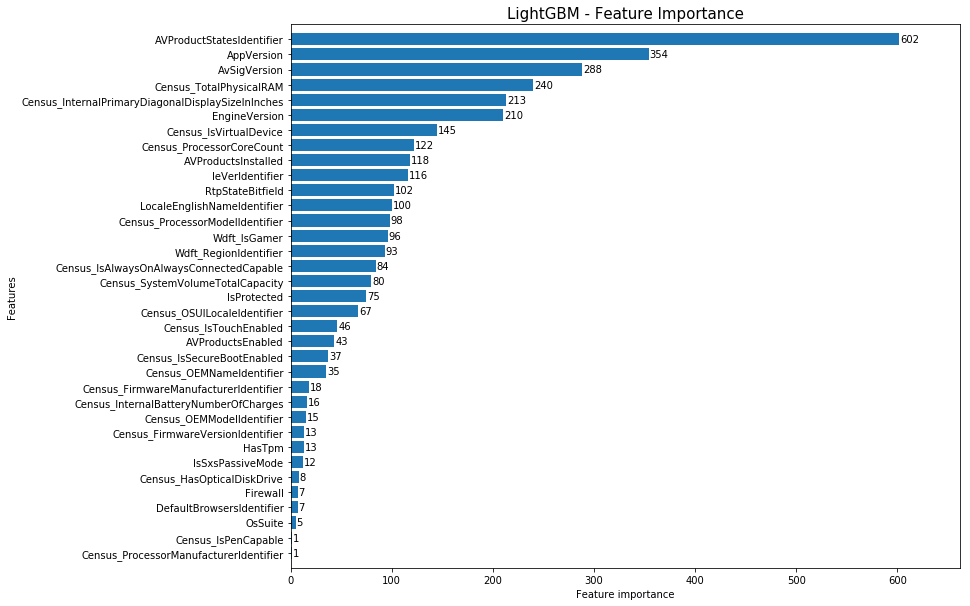

In [62]:
fig, ax = plt.subplots(figsize=(12,10))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

In [63]:
#Clear memory
del train_X, val_X, train_y, val_y
gc.collect()

22

In [64]:
# reading  test data
test = pd.read_csv('../input/test.csv', dtype=dtypes,  low_memory=True)
print('Loaded test data\n')

Loaded test data



In [65]:
test.shape

(7853253, 82)

Preprocess Test data

In [66]:
doLabelEncoding(test,cat_cols)

OsPlatformSubRelease
SkuEdition
SmartScreen
Census_MDC2FormFactor
Census_PrimaryDiskTypeName
Census_PowerPlatformRoleName
Census_InternalBatteryType
Census_OSEdition
Census_OSInstallTypeName
Census_OSWUAutoUpdateOptionsName
Census_GenuineStateName
Census_ActivationChannel
Census_FlightRing
ProductName


In [67]:
# print(test["AppVersion"].value_counts())
# print(test["EngineVersion"].value_counts())
# print(test["AvSigVersion"].value_counts())

In [68]:
# #Extract  sub version from subversion
test["AppVersion"] = test["AppVersion"].astype(object)
test["AppVersion"] = test["AppVersion"].apply(lambda x:  (re.split(r'\.', str(x)))[1])


#Extract  sub version from EngineVersion
test["EngineVersion"] = test["EngineVersion"].astype(object)
test["EngineVersion"] = test["EngineVersion"].apply(lambda x:  (re.split(r'\.',str(x)))[2])
# test["EngineVersion"].value_counts()


#Extract  sub version from AvSigVersion
test["AvSigVersion"] = test["AvSigVersion"].astype(object)
test["AvSigVersion"] = test["AvSigVersion"].apply(lambda x:  (re.split(r'\.',str(x)))[1])
# test["AvSigVersion"].value_counts()



In [69]:

test['AppVersion'] = pd.to_numeric(test['AppVersion'], errors='coerce').fillna(0)
test['EngineVersion'] = pd.to_numeric(test['EngineVersion'], errors='coerce').fillna(0)
test['AvSigVersion'] = pd.to_numeric(test['AvSigVersion'], errors='coerce').fillna(0)

In [70]:
# test['Census_PrimaryDiskTotalCapacity'] = preprocessing.scale(test['Census_PrimaryDiskTotalCapacity'].values)
# test['Census_SystemVolumeTotalCapacity'] = preprocessing.scale(test['Census_SystemVolumeTotalCapacity'].values)

# test['Census_TotalPhysicalRAM'] = preprocessing.scale(test['Census_TotalPhysicalRAM'].values)

# test['Census_InternalPrimaryDiagonalDisplaySizeInInches'] = preprocessing.scale(test['Census_InternalPrimaryDiagonalDisplaySizeInInches'].values)

# test['Census_InternalBatteryNumberOfCharges'] = preprocessing.scale(test['Census_InternalBatteryNumberOfCharges'].values)



In [71]:
# test["hd"] = test.apply(set_hd_category, axis=1)

In [72]:
remove_cols = ['PuaMode', 'Census_ProcessorClass', 'Census_IsWIMBootEnabled',
               'IsBeta', 'Census_IsFlightsDisabled', 'Census_IsFlightingInternal',
               'AutoSampleOptIn', 'Census_ThresholdOptIn', 'SMode',
               'Census_IsPortableOperatingSystem', 'Census_DeviceFamily', 
               'UacLuaenable', 'Platform', 'Census_OSSkuName', 
               'Census_OSInstallLanguageIdentifier', 'Processor']

test.drop(remove_cols, axis=1, inplace=True)


remove_cols = ['CountryIdentifier','GeoNameIdentifier',
               'OsVer','OsBuild','OsBuildLab',
               'Census_OSVersion',
             #  'Census_OSArchitecture','Census_OSBranch',
               'Census_OSBuildNumber','Census_OSBuildRevision'
]

# train.drop(remove_cols, axis=1, inplace=True)

test.drop(remove_cols, axis=1, inplace=True)


remove_cols = ['Census_InternalPrimaryDisplayResolutionHorizontal',
               "Census_InternalPrimaryDisplayResolutionVertical"
]

test.drop(remove_cols, axis=1, inplace=True)


In [73]:
# ohe_df = one_hot(test,ohe_cols)
# one_hot_cat_cols = ohe_df.columns

# test.drop(ohe_cols, axis=1, inplace=True)
# test = pd.concat([test, ohe_df], axis=1)


In [74]:
pred_test_y = model.predict(test[features])
out_df = pd.DataFrame({"MachineIdentifier":test["MachineIdentifier"].values})
out_df['HasDetections'] = pred_test_y
out_df.to_csv("submission.csv", index=False)